In [36]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [37]:
data_dir = '../data/raw/'

df = pd.read_csv(data_dir + "WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col="customerID")

print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
print(f"{df.dtypes}\n")
df

Dataset shape: 7043 rows, 20 columns

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [38]:
print("Checking for missing values ...")
print(df.columns[df.isnull().any()].to_list())

Checking for missing values ...
[]


In [39]:
print(f"Number of duplicated rows : {df.duplicated().sum()}")

Number of duplicated rows : 22


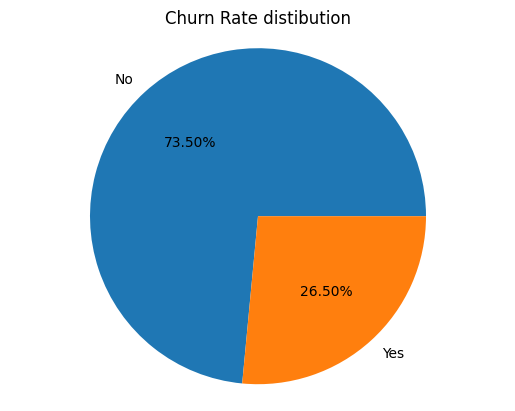

In [40]:
percents = ((df["Churn"].value_counts() / df["Churn"].value_counts().sum()) * 100).round(1).to_dict()

plt.pie(x=percents.values(), labels=percents.keys(), autopct="%1.2f%%")
plt.axis("equal")
plt.title("Churn Rate distibution")
plt.show()

The Churn column:
- Yes : the customer has left the service
- No  : the client stayed

## Analyse of categorical variables

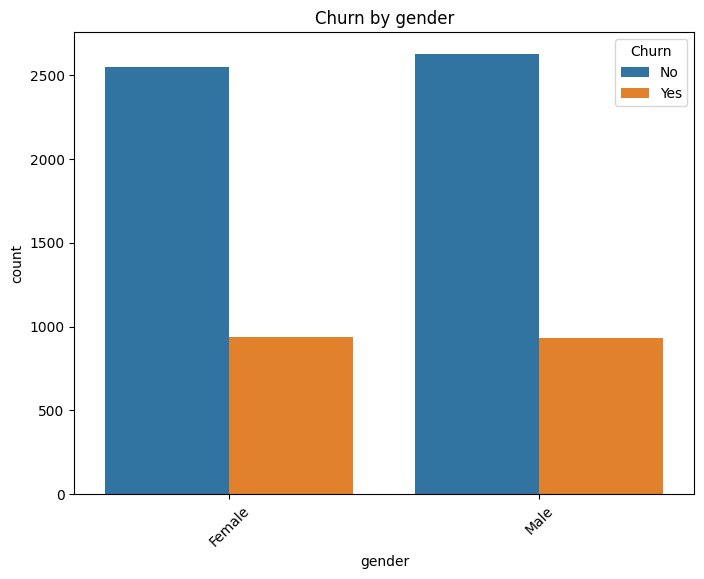

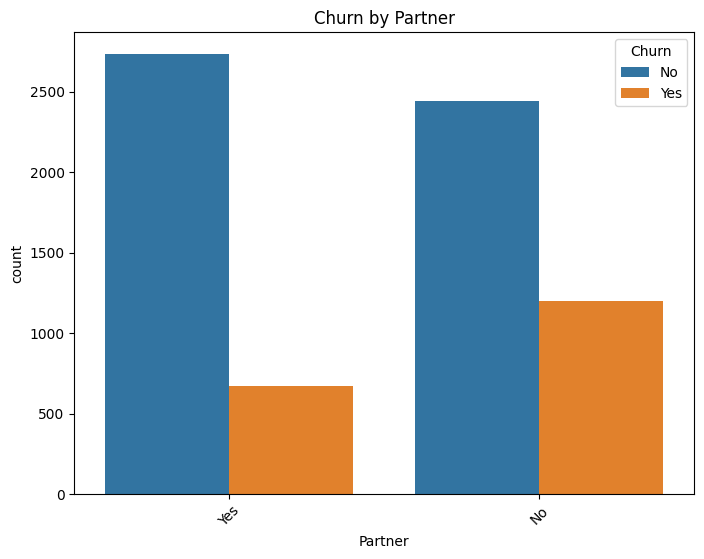

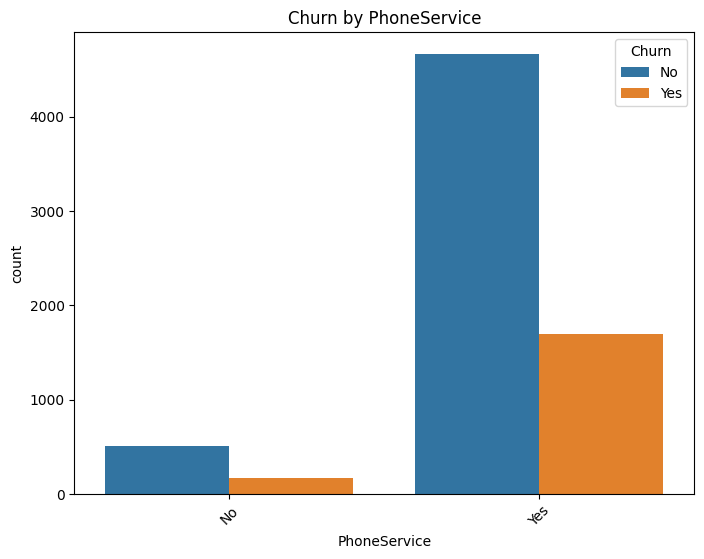

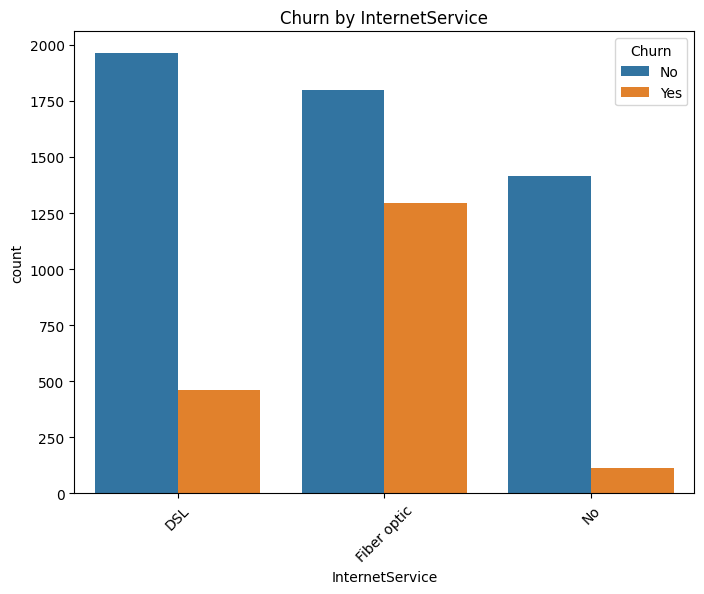

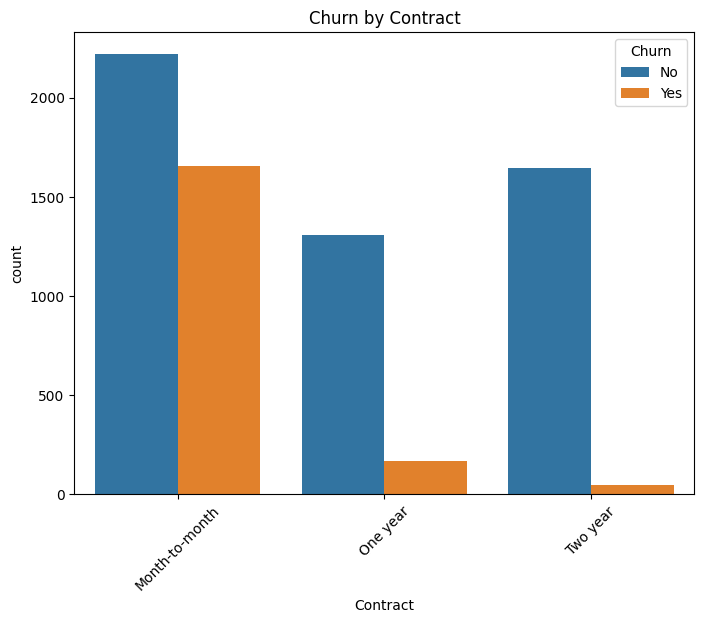

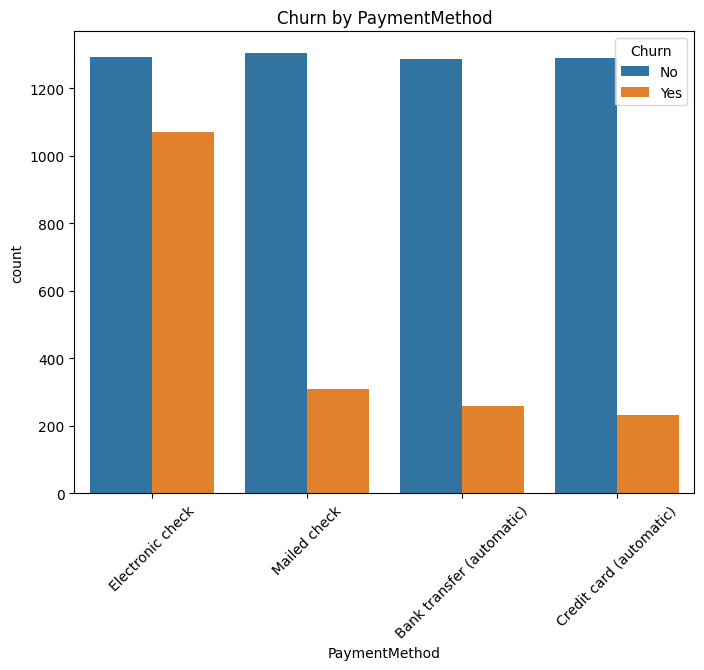

In [41]:
catego_cols = ["gender", "Partner", "PhoneService", "InternetService", "Contract", "PaymentMethod"]
for col in catego_cols :
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45, ha="center")
    

In [42]:
contract_churn_rate = (pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100).round(2)
InternetService_churn_rate = (pd.crosstab(df["InternetService"], df["Churn"], normalize="index") * 100).round(2)

display(contract_churn_rate, InternetService_churn_rate)

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


- Gender and PhoneService: Little to no visible effect on churn.
- Partner: Customers with a partner appear less likely to churn than those without.

- InternetService and Contract and have the strongest signal:
    
    - Customers on month-to-month contracts tend to churn the most; two-year contracts have the lowest churn :
    
        Month-to-month: 42.71% churn

        One year: 11.27% churn
        
        Two year: 2.83% churn
    - Fiber optic customers tend to churn more than DSL; “No internet” has the lowest churn :

        Month-to-month: 41.89% churn

        Fiber optic: 18.96% churn

        No: 7.4% churn


- PaymentMethod: Electronic check appears to have higher churn; automatic payment methods tend to have lower churn.



## Analyse of numerical variables

tenure : Number of months the customer has stayed with the company

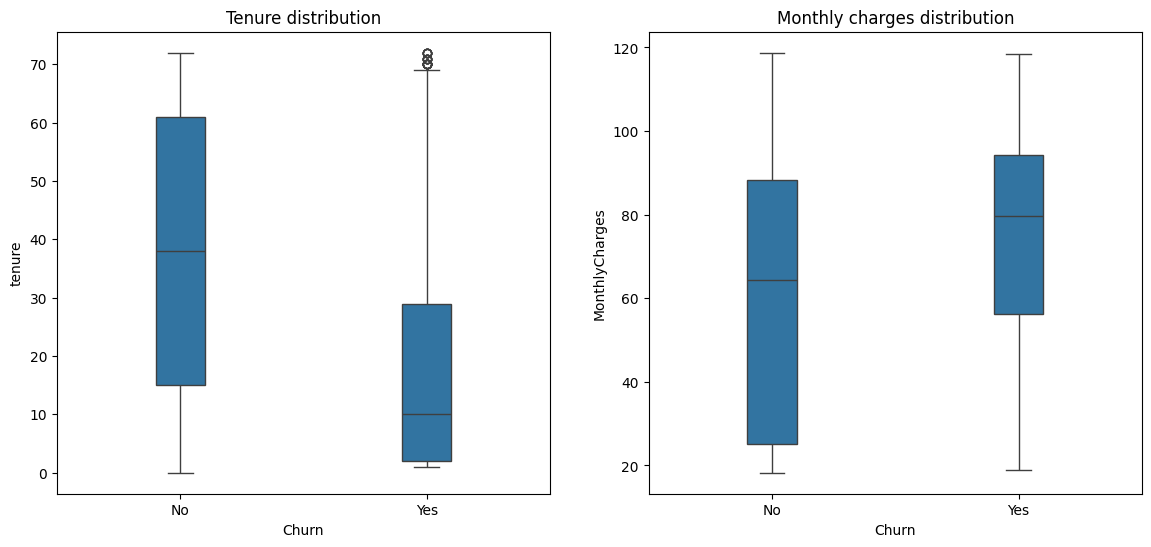

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flat
sns.boxplot(data=df, x="Churn", y="tenure", ax=axes[0], width=0.2)
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", ax=axes[1], width=0.2)
axes[0].set_title(f"Tenure distribution")
axes[1].set_title(f"Monthly charges distribution")
plt.show()

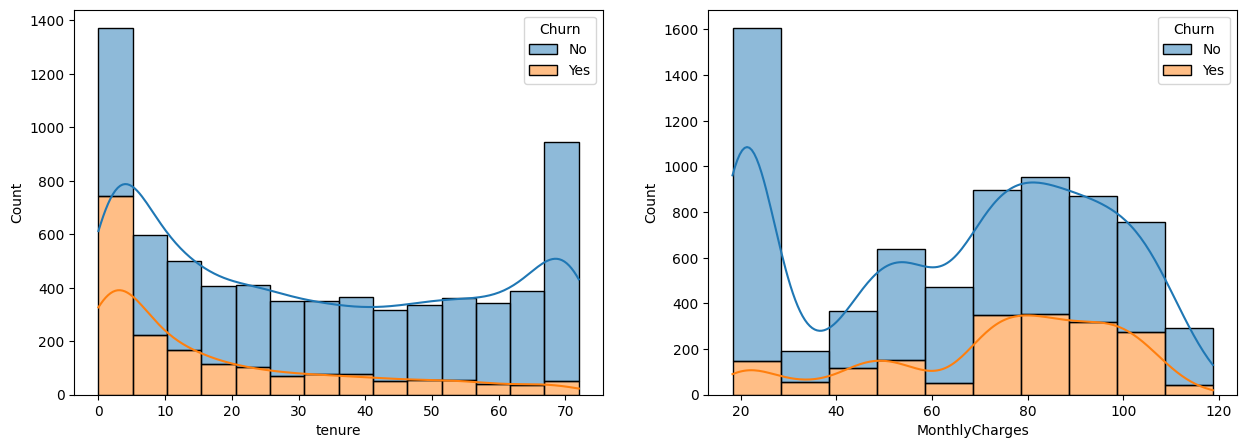

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes = axes.flat

sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", kde=True, binwidth=5, ax=axes[0])
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", kde=True, binwidth=10, ax=axes[1])

plt.show()

- Tenure: Strong signal. Churners have noticeably lower tenure; non-churners skew toward higher tenure.
- MonthlyCharges: Churners tend to have higher monthly charges.

In [45]:
df["TotalCharges"].replace(" ", np.nan, inplace=True)  # Replace empty strings with NaN
df["TotalCharges"] = df["TotalCharges"].astype(float)  # Convert to float
print(f"{df['TotalCharges'].isnull().sum()} missing values")

11 missing values


/tmp/ipykernel_260908/2323603910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", np.nan, inplace=True)  # Replace empty strings with NaN


Text(0.5, 1.0, 'Total charges distribution')

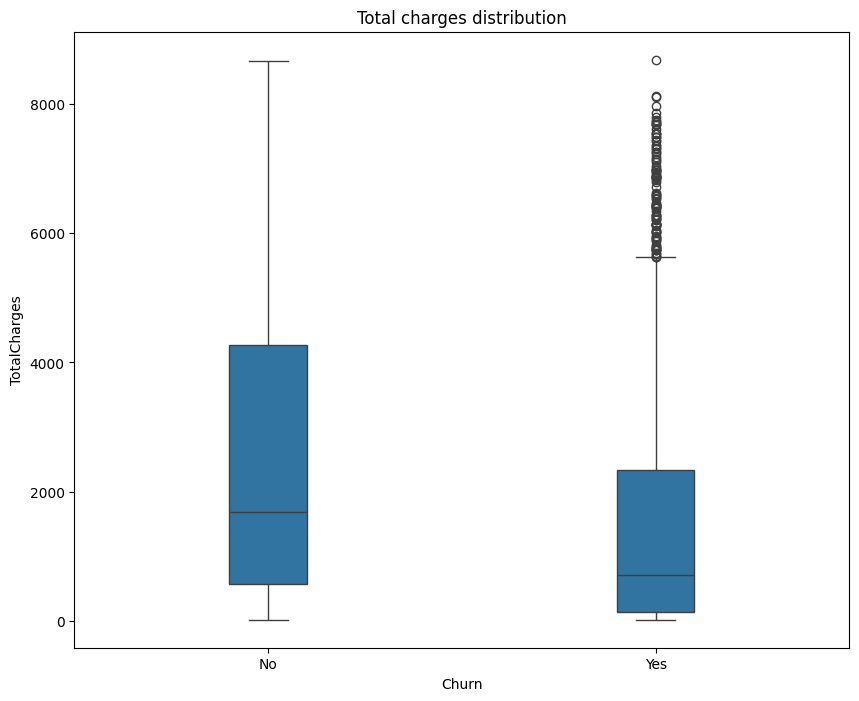

In [46]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Churn", y="TotalCharges", width=0.2)
plt.title(f"Total charges distribution")

<Axes: xlabel='TotalCharges', ylabel='Density'>

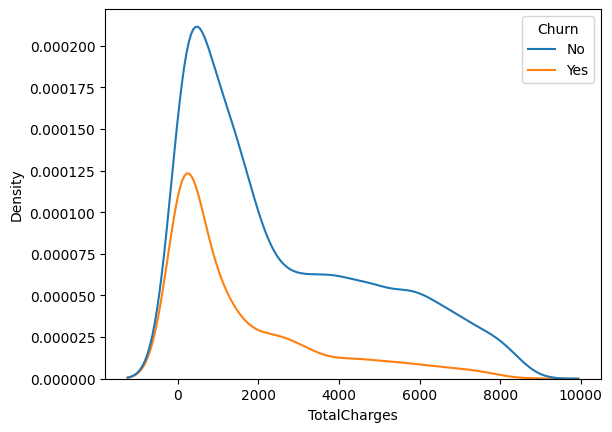

In [47]:
sns.kdeplot(df, x="TotalCharges", hue="Churn")

TotalCharges: Churners tend to have lower total charges (can be a consequence of lower tenure).

## Correlation Analysis

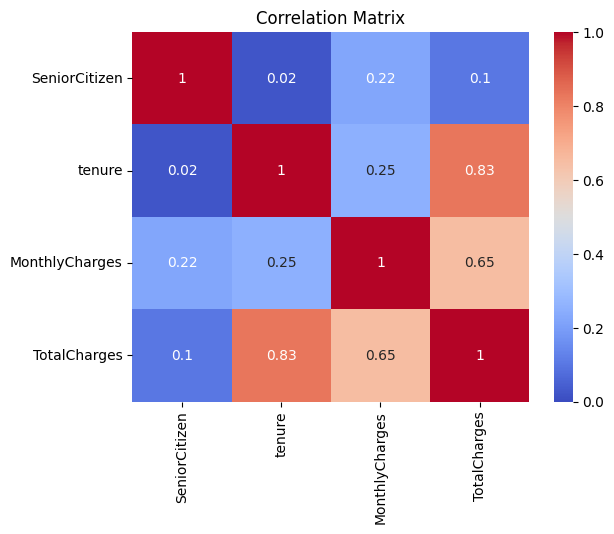

In [48]:
corr_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(abs(corr_matrix), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Strong correlation between tenure and MonthlyCharges, which is intuitive since TotalCharges accumulates over time.

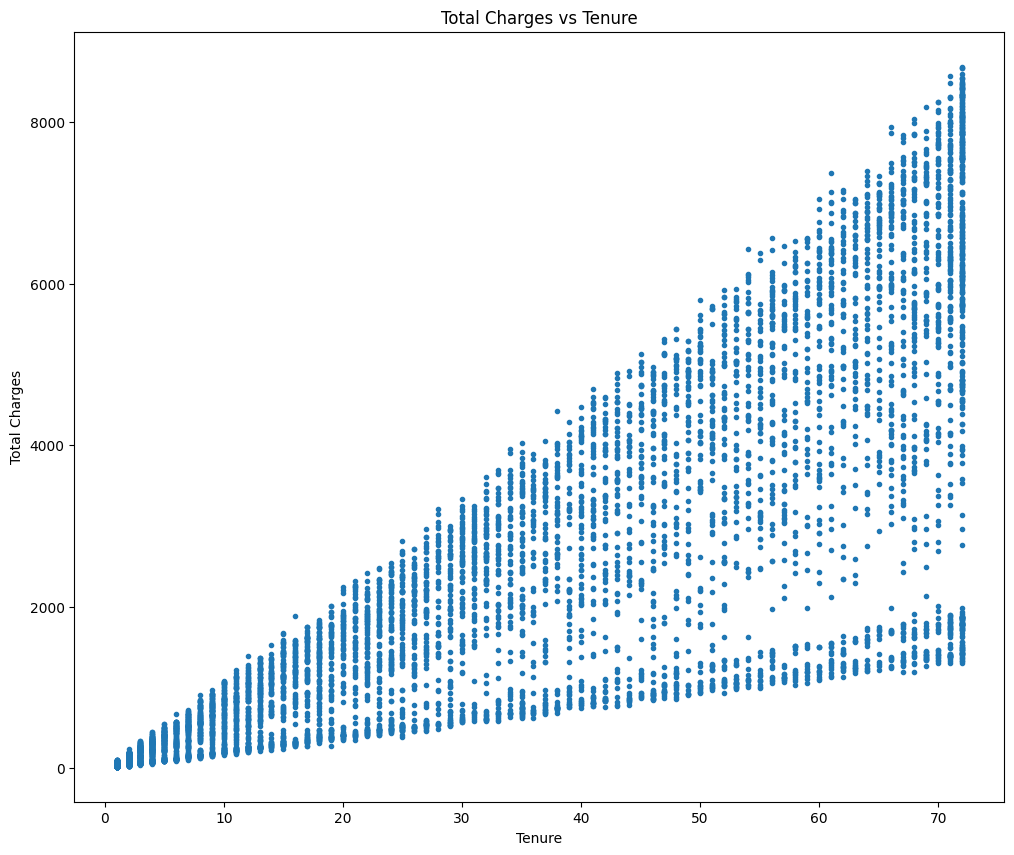

In [49]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df["tenure"], y=df["TotalCharges"], marker=".")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.title("Total Charges vs Tenure")
plt.show()